In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# Investigating Chaotic Systems
## The Hallmarks of Choas
* Determinism - if conditions are infinitely precise, rerunning the system will yield the same result (not like querying a random number generator)
* Boundedness - they do not blow up to inifity
* Irregularity or Semi-regularity
* Highly sensitive to innitial conditions
* Characterized by attractor manifolds
    * Strange Atrractor - a picture tells a story

In [18]:
# Define Lorenx system

def lorenz(state, t0, sigma = 10., beta = 8./3., rho = 28.0):

    # unpack state variables
    x = state[0]
    y = state[1]
    z = state[2]

    # Lorenz equations
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z

    return [dxdt, dydt, dzdt]


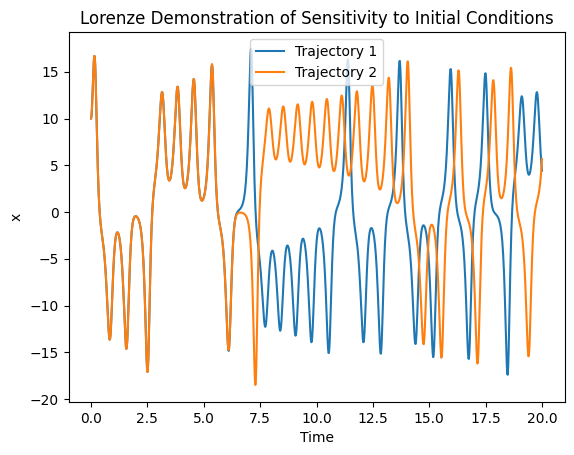

In [19]:
# demonstrate that there is sensitivity to initial conditions
N_trajectories = 2

# vector of the initial conditions
state0 = 10 + 0.01 * np.random.random((N_trajectories, 3)) # Lorenz initial conditions

# generate a time vector to integrate over
t = np.linspace(0, 20, 1000)

# use an in line forloop to simulate multiple systems with different initial conditions
state = np.asarray([odeint(lorenz, state0i, t)
                    for state0i in state0])

# plot the results
# state is a 3D array, the first dim is the trajectiry number, the second is time, 
# and the third is the state variable
plt.plot(t, state[0, :, 0])
plt.plot(t, state[1, :, 0])

plt.legend(('Trajectory 1', 'Trajectory 2'))
plt.xlabel('Time')
plt.ylabel('x')
plt.title('Lorenze Demonstration of Sensitivity to Initial Conditions')
plt.show()

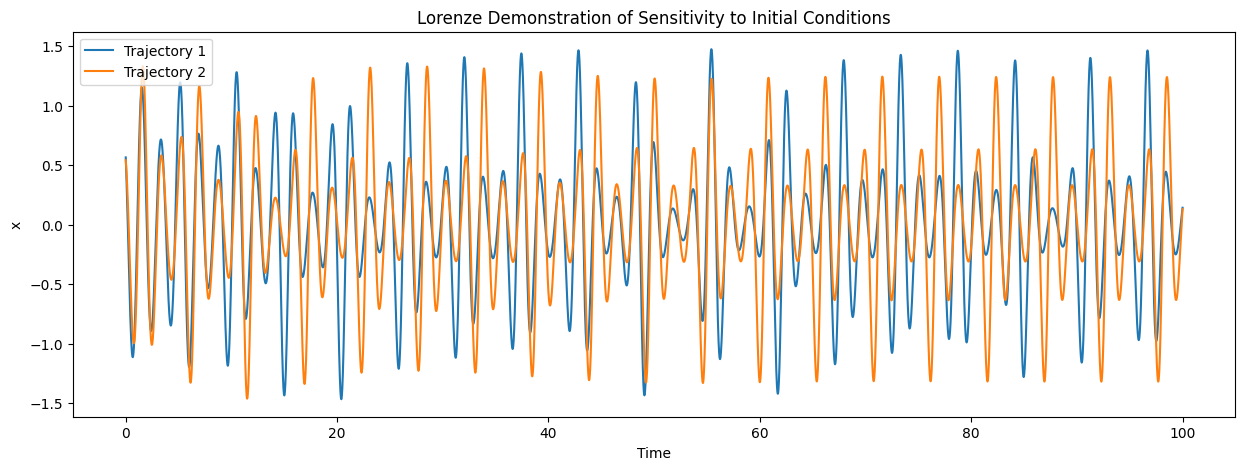

In [17]:
def aizawa(state, t0, a = 0.95, b = 0.7, c = 0.6, d = 3.5, e = 0.25, f = 0.1):
    x = state[0]
    y = state[1]
    z = state[2]

    dxdt = (z - b) * x - d * y
    dydt = d * x + (z - b) * y
    dzdt = c + a * z - (1/3) * z**3 - (x**2 + y**2) * (1 + e * z) + f * z * x**3

    return [dxdt, dydt, dzdt]

# x0 = 0.1 + np.random.random((N_trajectories, 3))

# demonstrate that there is sensitivity to initial conditions
N_trajectories = 2

# vector of the initial conditions
state0 = 0.1 + np.random.random((N_trajectories, 3))

# generate a time vector to integrate over
t = np.linspace(0, 100, 10000)

# use an in line forloop to simulate multiple systems with different initial conditions
state = np.asarray([odeint(aizawa, state0i, t)
                    for state0i in state0])

# plot the results
# state is a 3D array, the first dim is the trajectiry number, the second is time, 
# and the third is the state variable
plt.figure(figsize = (15, 5))
plt.plot(t, state[0, :, 0])
plt.plot(t, state[1, :, 0])

plt.legend(('Trajectory 1', 'Trajectory 2'))
plt.xlabel('Time')
plt.ylabel('x')
plt.title('Lorenze Demonstration of Sensitivity to Initial Conditions')
plt.show()


# Is Predictive Science Useless?

## No!
There are both quantitative and qualitative methods for characterizing chaotic systems

1) Lyaponov exponents
2) Poincare Maps
3) Descriptions of the attractor

# Lyaponov Exponents

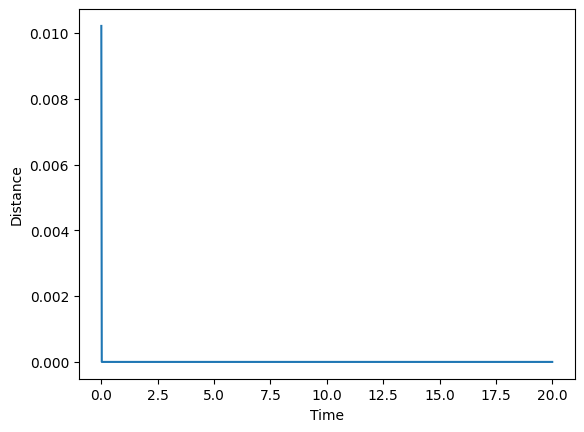

In [22]:
from scipy import spatial as sp

def compute_dst(state):
    # compute the euclidean distance between two or more trajectories

    dst = np.zeros((1, state.shape[1])) # initialize the distance array

    # loop over time 
    for i in np.arange(0, state.shape[1]):
        dst[0, i] = sp.distance.euclidean(state[0, i, :], state[1, i, :]) # compute the distance between two trajectories at time i

        return (dst.T)

dst = compute_dst(state)
plt.plot(t, dst)
plt.xlabel('Time')
plt.ylabel('Distance')
plt.show()

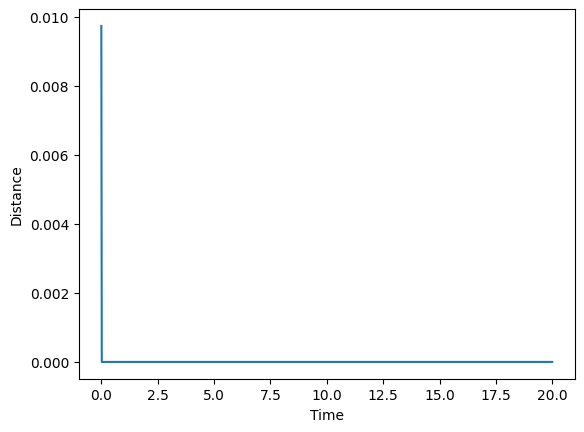

In [23]:
# demonstrate the relationship between ICs and time to diverge

# demonstrate that there is sensitivity to initial conditions
N_trajectories = 2

# vector of the initial conditions
state0 = 10 + 0.01 * np.random.random((N_trajectories, 3)) # Lorenz initial conditions

# generate a time vector to integrate over
t = np.linspace(0, 20, 1000)

# use an in line forloop to simulate multiple systems with different initial conditions
state = np.asarray([odeint(lorenz, state0i, t)
                    for state0i in state0])

# plot the results
# state is a 3D array, the first dim is the trajectiry number, the second is time, 
# and the third is the state variable
dst = compute_dst(state)
plt.plot(t, dst)
plt.xlabel('Time')
plt.ylabel('Distance')
plt.show()

In [25]:
# lets simulate a huge number of trajectories and look at divergence

t = np.linspace(0, 50, 10000)
D = np.zeros((len(t), 100))

for i in np.arange(0, 100):
    state0i = 10 + 0.01*np.random.random((N_trajectories, 3))
    state = np.asarray([odeint(lorenz, state0i, t)
                        for state in state0i in state0])

dst = compute_dst(state)

D[:,i] = dst[:, 0]

plt.plot(dst)

TypeError: 'bool' object is not iterable

/var/folders/sw/yf60_nh53c543ptzhw6txfhm0000gn/T/ipykernel_41433/2438326110.py:4: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.ylim(0, 20)
/var/folders/sw/yf60_nh53c543ptzhw6txfhm0000gn/T/ipykernel_41433/2438326110.py:4: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 20)


Text(0, 0.5, 'Mean Divergence Between Points')

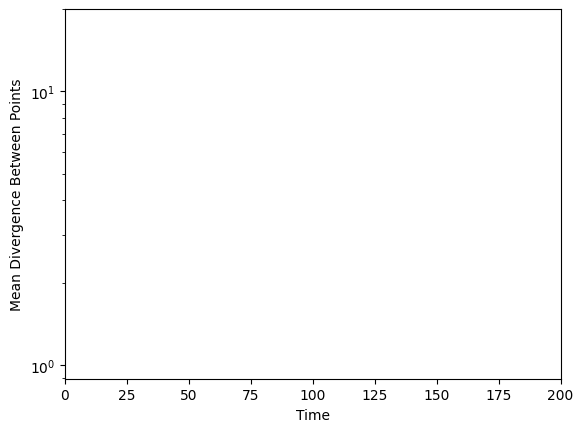

In [26]:
# plot the mean divergence

plt.semilogy(t, np.mean(D, axis = 1))
plt.ylim(0, 20)
plt.xlim(0, 200)
plt.xlabel('Time')
plt.ylabel('Mean Divergence Between Points')

Text(0.5, 0, 'Time')

/Users/mkayeterry/Library/Python/3.10/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  func(*args, **kwargs)


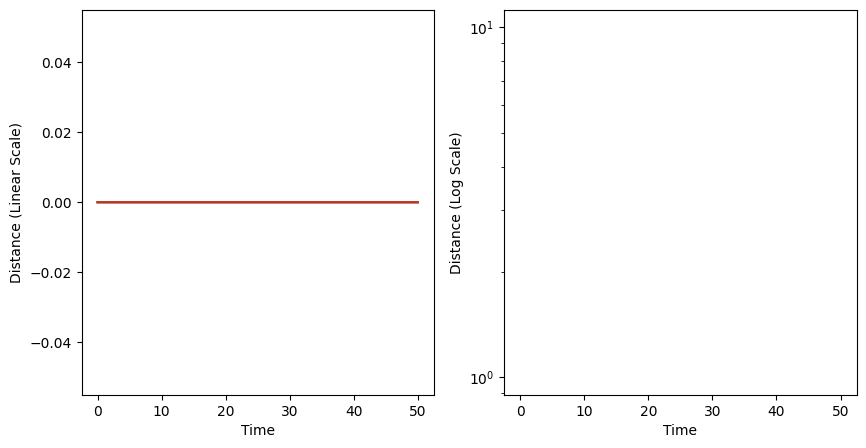

In [28]:
# The relationship between log and linear space
D0 = np.mean(D[0, :])

plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
for lyaponov in np.arange(0.1, 0.5, 0.1):
    plt.plot(t, D0*np.exp(lyaponov*t))
plt.ylabel('Distance (Linear Scale)')
plt.xlabel('Time')

plt.subplot(1, 2, 2)
for lyaponov in np.arange(0.1, 0.5, 0.1):
    plt.semilogy(t, D0*np.exp(lyaponov*t))
plt.ylabel('Distance (Log Scale)')
plt.xlabel('Time')

In [29]:
lyaponov = 0.2

plt.plot(t, D0*np.exp(lyaponov*t))

plt.xlim(0, 20)
plt.ylim(0, 200)


# plot distance
plt.semilogy(t, np.mean(D, axis = 1))

plt.xlabel('Time')
plt.ylabel('Distnace')

Text(0, 0.5, 'Distnace')

Error in callback <function _draw_all_if_interactive at 0x14c1160e0> (for post_execute):


ValueError: Data has no positive values, and therefore can not be log-scaled.

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 640x480 with 1 Axes>